# Homework 5 

In [2]:
#imports
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import itertools as it

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [3]:
seed = 42

### Gradient descent and backpropagationg in a simple neural network

did most on paper, but didnt bother writing it into latex

In [4]:
def func(w):
    # task 1 and 2
    # also did it by hand, but had to check
    x = [
        [2,1],
        [-3,2]
    ]
    y = [1.3, 1.9]
    print(w)
    def relu(x):
        return max(0, x)

    def layer1(x, w):
        return relu(x[0] * w[0] + x[1] * w[1] + w[2])

    def output(z, w):
        return z * w[3] + w[4]

    sum = 0
    for xs, ys in zip(x, y):
        z = layer1(xs, w)
        print(f"z:{z}")
        o = output(z, w)
        sum = sum + (o - ys) ** 2
        print(f"guessed value: {o}, actual value: {ys}")

    print(f"mean of mse:{sum/len(y)}")


print("first pass")
w = [1,1,0,1,0]
func(w)

print("\nsecond pass")
# my hand calculated gradient
# may be wrong iunno
w2 = [3.4, 1.7, 1.7, 5.1, -0.2]
w = np.array(w) - 0.01 * np.array(w2)
func(w)

first pass
[1, 1, 0, 1, 0]
z:3
guessed value: 3, actual value: 1.3
z:0
guessed value: 0, actual value: 1.9
mean of mse:3.25

second pass
[ 0.966  0.983 -0.017  0.949  0.002]
z:2.898
guessed value: 2.7522019999999996, actual value: 1.3
z:0
guessed value: 0.002, actual value: 1.9
mean of mse:2.855647324401999


### Neural networks for regression task using scikit-learn

In [5]:
features = np.load("features.npy", allow_pickle=True)
targets = np.load("targets.npy")
print(features.shape, targets.shape)

(4177, 7) (4177, 1)


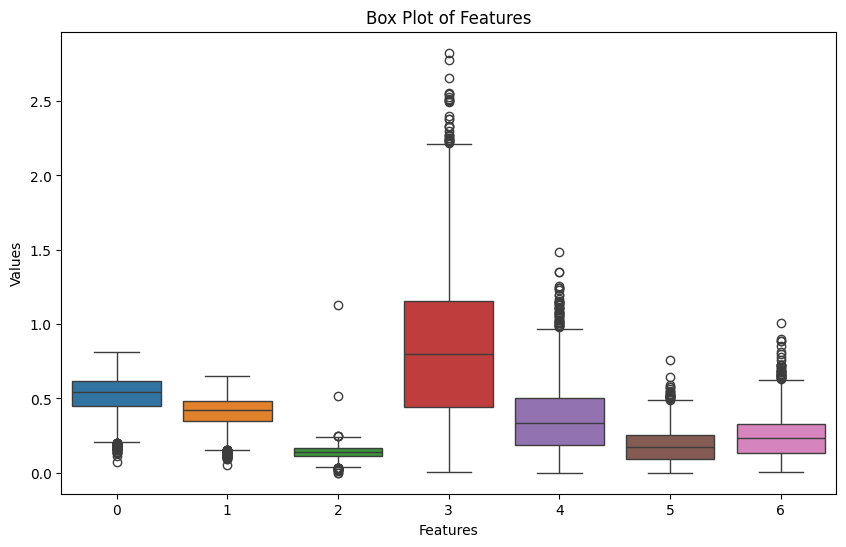

In [6]:
# Distribution plot Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

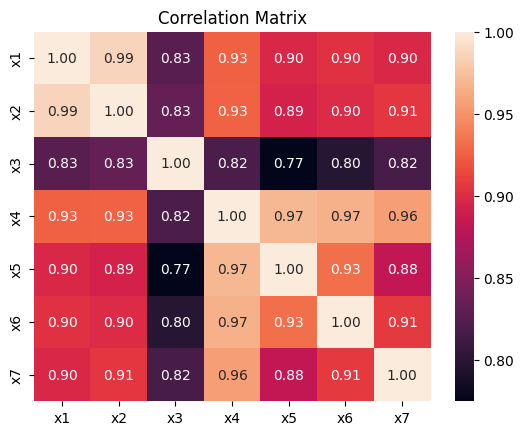

In [7]:
# correlation matrix
R1 = np.corrcoef(features, rowvar=False, dtype=np.float64)
labels = ["x1", "x2", "x3", "x4", "x5", "x6", "x7"]
plt.title("Correlation Matrix")
sns.heatmap(R1, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.show()

In [8]:
X_train, X_val_test, y_train, y_val_test = train_test_split(
    features, targets[:,0], test_size=0.2, random_state=seed)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=seed)

In [9]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [13]:
import multiprocessing as mp

grid = {
    'hidden_layer_sizes': [(20, 3), (37, 3), (50, 3)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500],
    'alpha': [0.01],
    'momentum': [0.9],
}

iters = it.product(*grid.values())

def func(params):
    model = MLPRegressor(random_state=seed, **dict(zip(grid.keys(), params)))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"mse: {mse}")


pool = mp.Pool(mp.cpu_count())
pool.map(func, iters)

mse: 9.492589450137714
mse: 4.2583293641307645
mse: 9.473336074783935
mse: 9.475608257661193
mse: 4.6801361825208625
mse: 4.392416678274746
mse: 4.322143804010796
mse: 4.313679347421274
mse: 4.870144884735837
mse: 9.62120484770174
mse: 4.3435116104313165
mse: 4.4472576046447
mse: 4.4307357950851


/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


mse: 4.449338883333294
mse: 9.479629768761246


/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


mse: 10.44162034134376


/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


mse: 4.552727422898893
mse: 5.265917910840853
mse: 4.165988505487627
mse: 4.2400466144136715
mse: 9.49429775438936
mse: 9.53201878150926
mse: 4.246388770273806


/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


mse: 4.197819836512481
mse: 4.256414018474416
mse: 4.343121840734476


/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


mse: 4.470362201931644
mse: 4.179105239114505
mse: 9.478299630381002
mse: 4.653309925025623


/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


mse: 4.401745257662933
mse: 4.51288407505251
mse: 9.502346580475294
mse: 4.167749338015223
mse: 4.2012957148191115
mse: 9.502361892037065
mse: 4.4341754092349195
mse: 4.335004762287756
mse: 9.477855282390424
mse: 9.448369356744001
mse: 4.209000185838037
mse: 4.2220671948901565
mse: 4.404564608981458


/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


mse: 4.402434761739459
mse: 4.279782074100118
mse: 9.474016529229727


KeyboardInterrupt: 

mse: 4.266288274895172
mse: 4.4208629115190625
mse: 4.648996227477067


/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


mse: 4.386315587159985
mse: 4.541438840897186


/home/vhrollo/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


mse: 4.484425960306478
mse: 4.148673790522152


{'activation': 'logistic',\
 'alpha': 0.0001,\
 'hidden_layer_sizes': (20,),\
 'learning_rate': 'constant',\
 'learning_rate_init': 0.001,\
 'max_iter': 100,\
 'solver': 'lbfgs'}